# Linear Regression from Scratch

Pada tugas ini, algoritma linear regression yang dibuat menggunakan multiple linear regression. Multiple Linear Regression akan memprediksi satu variable y yang bergantung terhadap n-variable x. Untuk persamaannya, saya merujuk pada buku Probability and Statistics for Engineers & Scientists 9th ed., Ronald E. Walpole et al. 

## 1. Mengambil data CSV

Data yang digunakan pada tugas kali ini, menggunakan referensi yang dirujuk pada repo, yaitu https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

Untuk dapat mengambil data CSV, kita perlu menggunakan library dari julia yang bernama "CSV" dan menggunakan library tersebut dengan menggunakan "using CSV", apabila bermasalah, dapat menginstall terlebih dahulu package tersebut dengan menjalankan julia kemudian "using Pkg", lalu "Pkg.add("CSV").

Data CSV di download terlebih dahulu dari sumber, dan dimasukkan ke root directory pada repo ini, kemudian baca data CSV tersebut dengan method CSV.read dan simpan data tersebut ke variabel df. 

In [182]:
using CSV

df = CSV.read("car data.csv")

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type
,String,Int64,Float64,Float64,Int64,String,String
1,ritz,2014,3.35,5.59,27000,Petrol,Dealer
2,sx4,2013,4.75,9.54,43000,Diesel,Dealer
3,ciaz,2017,7.25,9.85,6900,Petrol,Dealer
4,wagon r,2011,2.85,4.15,5200,Petrol,Dealer
5,swift,2014,4.6,6.87,42450,Diesel,Dealer
6,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer
7,ciaz,2015,6.75,8.12,18796,Petrol,Dealer
8,s cross,2015,6.5,8.61,33429,Diesel,Dealer
9,ciaz,2016,8.75,8.89,20273,Diesel,Dealer


## 2. Splitting Dataset

Sebelum melakukan splitting, kita perlu mengimport beberapa library yang akan digunakan pada tugas ini, seperti LinearAlgebra, Statistics, Plots, Compat, dan DataFrame. Library tersebut akan membantu kita untuk mengolah dataset. Apabila package tersebut belum terinstall, kita perlu install terlebih dahulu, seperti yang dilakukan pada langkah pertama untuk kasus CSV. Kemudian, kita juga perlu import Linear Regression buatan kita dengan include file yang telah kita buat kemudian import module buatan kita.

Kemudian, Dataset akan di split menjadi data train dan data test. Data train akan memiliki 80% data dari keseluruhan, sedangkan data test sisanya. 

In [183]:
using LinearAlgebra, Statistics, Plots, Compat, DataFrames

include("regression.jl")
using .LinearRegression

n = size(df, 1)
n_train = Int(floor(n * 0.8))
data_train = df[1:n_train, :]
data_test = df[n_train+1 : n, :]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type
,String,Int64,Float64,Float64,Int64,String,String
1,verna,2012,5.35,9.4,32322,Diesel,Dealer
2,xcent,2015,4.75,7.13,35866,Petrol,Dealer
3,xcent,2014,4.4,7.13,34000,Petrol,Dealer
4,i20,2016,6.25,7.6,7000,Petrol,Dealer
5,verna,2013,5.95,9.4,49000,Diesel,Dealer
6,verna,2012,5.2,9.4,71000,Diesel,Dealer
7,i20,2012,3.75,6.79,35000,Petrol,Dealer
8,verna,2015,5.95,9.4,36000,Petrol,Dealer
9,i10,2013,4.0,4.6,30000,Petrol,Dealer


## 3. Menggunakan Algoritma Linear Regression

Setelah data di split, kita akan langsung menggunakan algoritma Linear Regression yang telah kita buat pada file "regression.jl". Untuk menggunakan algoritma tersebut, kita perlu membentuk sebuah struct Regression dengan struktur seperti berikut :
1. data (data train untuk membentuk model)
2. attribute (list of attribute, atribut atau variabel x yang mempengaruhi variabel y yang akan diprediksi)
3. target (string, variabel y yang akan diprediksi)
4. model (list of float, koefisien atau bobot untuk persamaan dari linear regression untuk tiap atribut)
5. dataTest (data test yang akan digunakan untuk prediksi dan evaluasi akurasi algoritma)

Untuk attribute akan diinisialisasi dengan list kosong, target dengan string kosong, dan model dengan list kosong. Setelah itu, kita akan menentukan attribute mana yang akan mempengaruhi variabel yang akan diprediksi. Pada kasus ini, kita akan menggunakan atribut "Year", "Selling_Price", dan "Kms_Driven" untuk memprediksi "Present_Price". Lalu, kita langsung dapat menjalankan fungsi train terhadap Regression yang telah kita buat.

In [184]:
regression = LinearRegression.Regression(data_train,[],"",[],data_test)
LinearRegression.setAttribute(regression, ["Year", "Selling_Price", "Kms_Driven"])
LinearRegression.setTarget(regression, "Present_Price")
LinearRegression.train(regression)

4-element Array{Float64,1}:
 1430.7529626339674
   -0.7106180915366167
    1.604670286389421
    1.0282216878709782e-5

## 4. Melakukan Prediksi terhadap Data Test dan Menunjukkan Akurasi Algoritma

Selanjutnya, kita akan melakukan prediksi terhadap data test. Untuk melakukan itu, kita dapat langsung memanggil fungsi predict, dan kemudian hasil dari prediksi tersebut kita akan simpan ke dalam sebuah array yang nantinya akan kita gunakan untuk plotting. Setelah fungsi predict dipanggil, kita akan dapat melihat akurasi dari algoritma yang telah kita buat dengan menggunakan mean absolute error. 

In [185]:
result = LinearRegression.predict(regression)

Mean absolute error : 1.1232618623640556
Root mean square error : 1.4609056926667874


61-element Array{Float64,1}:
  9.906690308431653
  6.848474038606299
  6.978270913210946
  8.248054904232976
 10.330361201831813
 10.063685349907978
  7.366753627009765
  8.775456199335352
  7.005892022676955
  6.746206786630654
 19.216617971891218
  8.885107781944805
  7.8458669640348315
  ⋮
 14.483005432873409
  6.984504688669241
  7.8458669640348315
  8.54016653158494
  8.016501317524417
  5.925148372299808
 13.195153597519663
 13.740729804121216
  5.893122345965015
  9.40101865532147
 15.982520249998242
  6.707824647037328

## 5. Visualisasi Hasil Prediksi

Terakhir, kita akan memvisualisasikan hasil prediksi yang telah kita lakukan dengan menggunakan scatter plot. Dan juga, kita akan memvisualisasikan model yang didapatkan dengan menggunakan line plot. Hal tersebut dapat dilakukan dengan melakukan plotting terlebih dahulu scatter plot antara variabel yang mempengaruhi y terhadap y hasil prediksi. Kemudian, kita dapat menambahkan lagi plot line regresi dengan persamaan A c = X, kemudian akan didapat hasil c tersebut yg merupakan regresi dari variabel x terhadap y.

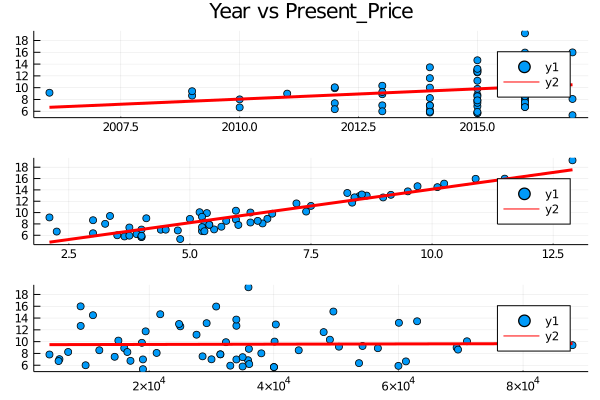

In [179]:
x1 = data_test[:, "Year"]
scatter(x1,result)

A1 = [ones(n - n_train) x1]
c1 = A1\result
f1 = c1[1]*ones(n - n_train) + c1[2]*x1
p1 = plot!(x1,f,linewidth=3, color=:red, title="Year vs Present_Price")

x2 = data_test[:, "Selling_Price"]
scatter(x2, result)

A2 = [ones(n - n_train) x2]
c2 = A2\result
f2 = c2[1]*ones(n - n_train) + c2[2]*x2
p2 = plot!(x2, f2,linewidth=3, color=:red, title = "Selling_Price vs Present_Price")

x3 = data_test[:, "Kms_Driven"]
scatter(x3, result)

A3 = [ones(n - n_train) x3]
c3 = A3\result
f3 = c3[1]*ones(n - n_train) + c3[2]*x3
p3 = plot!(x3, f3,linewidth=3, color=:red, title = "Kms_Driven vs Present_Price")

plot(p1, p2, p3, layout = (3,1))